#Punto 2
David Bernal & Juan Diego Arango

In [25]:
%pylab inline
from sklearn import decomposition
from sklearn import cluster
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV

from mpl_toolkits.mplot3d import Axes3D


Populating the interactive namespace from numpy and matplotlib


# Random Forest

In [26]:
vino=transpose(transpose(loadtxt('wine.dat', delimiter =","))[1:])
label=transpose(loadtxt('wine.dat', delimiter =","))[:1][0]
indices_aleatorios=randint(0,len(label),len(label))
vino=vino[indices_aleatorios]
label=label[indices_aleatorios]
n=35
vino_train=vino[:n]
lugar_train=label[:n]
vino_test=vino[n:]
lugar_test=label[n:]

In [27]:
rf = RandomForestClassifier(n_estimators=1)
rf.fit(vino_train,lugar_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
total_arboles = n
x=range(1,n+1)
clasificadores=[]
for k in range (0,200):#numero de corridas
    suma = np.zeros(total_arboles)
    for j,i in enumerate (x):
        rf = RandomForestClassifier(n_estimators=i)
        rf.fit(vino_train, lugar_train)
        prediccion = rf.predict(vino_test)
        suma[j] = sum((prediccion - lugar_test)**2)        
    clasificadores.append(where(suma==min(suma))[0][0])
conteo = np.bincount(clasificadores)
print np.argmax(conteo)

16


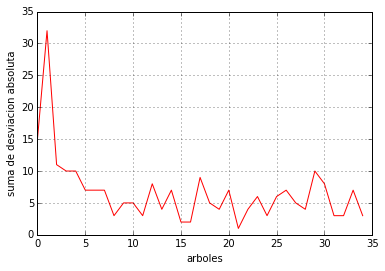

In [29]:
prediccion = rf.predict(vino_test)
sum((prediccion-lugar_test)**2)
plt.plot(suma,color="red")
xlabel("arboles")
ylabel("suma de desviacion absoluta")
plt.grid()

Se correra el programa para encontrar el bosque aleatorio para el conjunto de datos, la idea es que se correra en varias ocasiones y se observara cuando la diferencia entre el la prediccion de los datos y los datos reales se hace menor. Se repite esto para ver para cual numero de arboles esto ocurre con mayor frecuencia.

Según el procedimiento seguido, el numero optimo de clusters en esta caso son 16.

# PCA

Es necesario hacer la media de los datos 0 y la varianza 1

In [30]:
vino=transpose(loadtxt('wine.dat', delimiter =","))[1:]
for i in range (0, len(vino)):
    vino[i]=vino[i]-mean(vino[i])
    vino[i]=vino[i]/sqrt(var(vino[i]))
vino=transpose(vino)



Se obtiene todos los componentes principales y se observa el porcentaje que cada uno captura

[ 0.36198848  0.1920749   0.11123631  0.0706903   0.06563294  0.04935823
  0.04238679  0.02680749  0.02222153  0.01930019  0.01736836  0.01298233
  0.00795215]


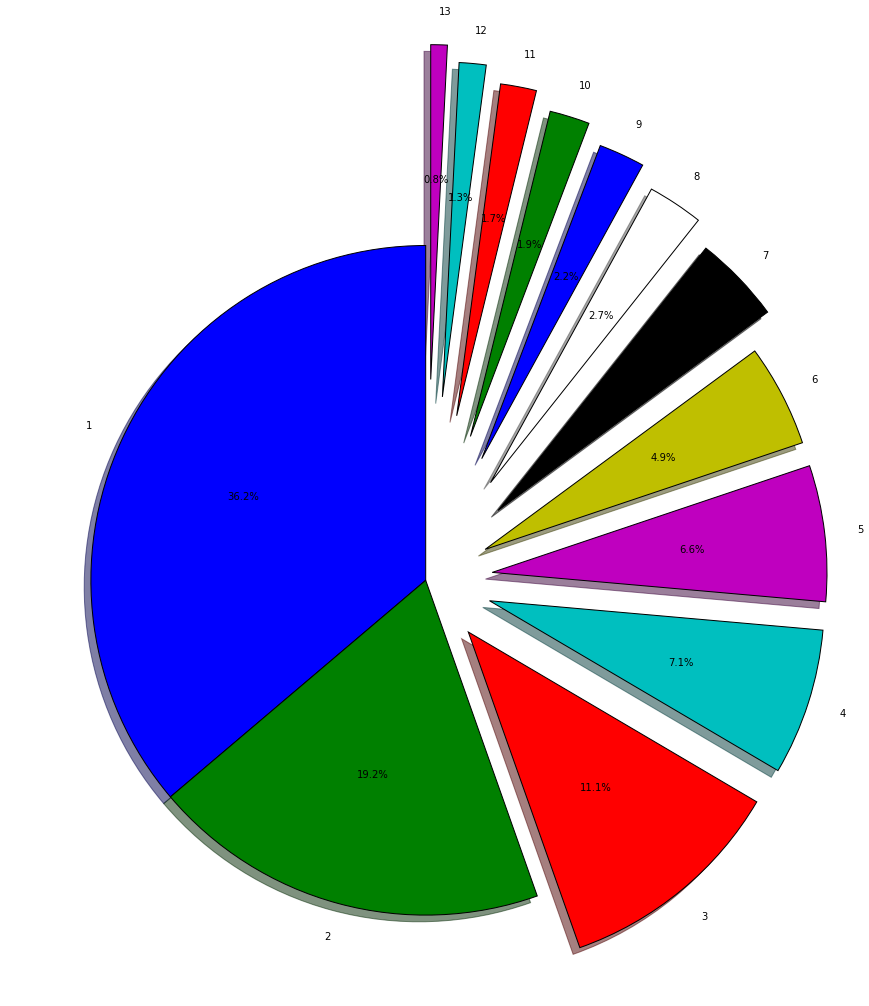

In [31]:
pca = decomposition.PCA()
pca.fit(vino)
y=pca.explained_variance_ratio_ 
labels = '1', '2', '3', '4','5','6','7','8','9','10','11','12','13'
explode = (0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.3, 0.35, 0.4, 0.45,0.5,0.55,0.6)  # only "explode" the 2nd slice (i.e. 'Hogs')
pylab.rcParams['figure.figsize'] = (15, 15)
print(y)
a=pie(y, explode=explode,labels=labels,autopct='%1.1f%%', shadow=True,startangle=90)


Se puede notar que los compoentes que mas ocupan son el primero y segundo, que son mas del 50 %

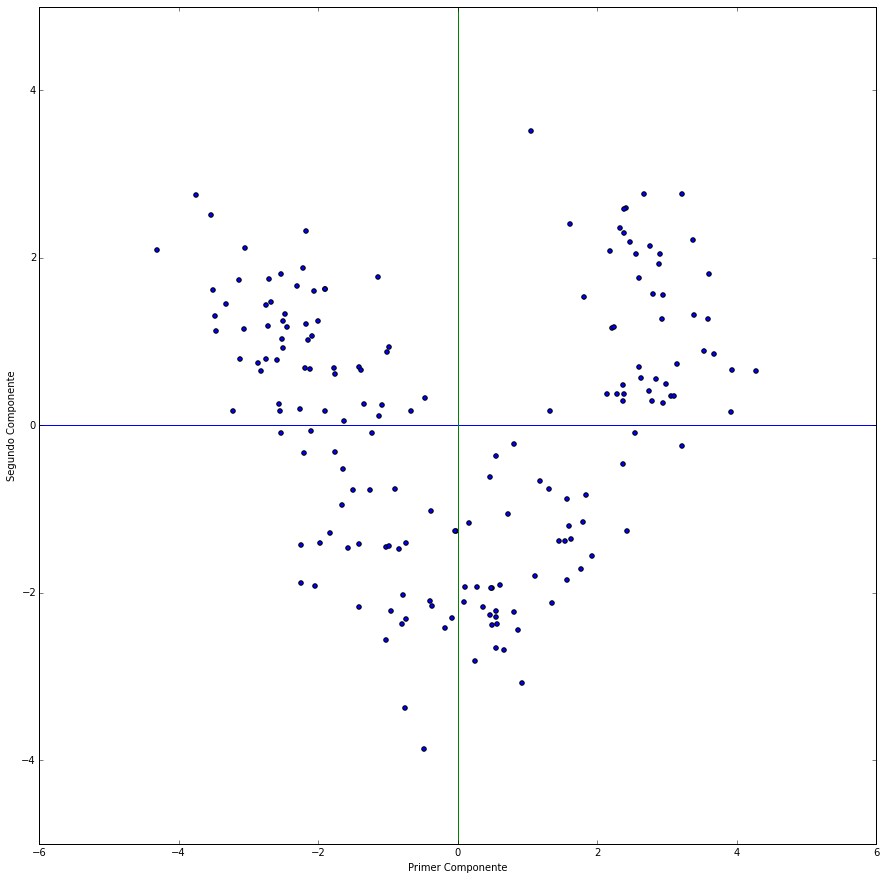

In [32]:
pca = decomposition.PCA(2)
pca.fit(vino)
vino_2D = pca.transform(vino)
Componentes=pca.transform(pca.components_)
x=linspace(-15,15,2)
y1=Componentes[0][1]/Componentes[0][0]*(x) 
y2=Componentes[1][1]/Componentes[1][0]*(x) 
vino_2D=transpose(vino_2D)
scatter(vino_2D[0],vino_2D[1])
plot(x,y1)
plot(x,y2)
ylim(-5,5)
xlim(-6,6)
xlabel("Primer Componente")
ylabel("Segundo Componente")

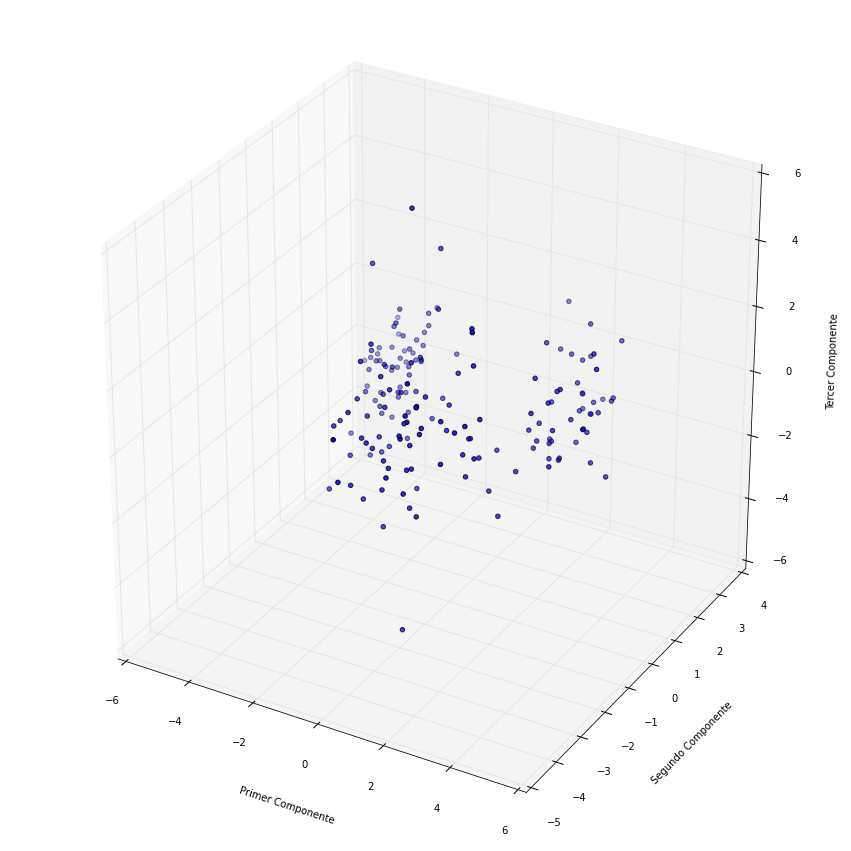

In [33]:
pca = decomposition.PCA(3)
pca.fit(vino)
vino_3D = pca.transform(vino)
Componentes=pca.transform(pca.components_)
vino_3D=transpose(vino_3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vino_3D[0],vino_3D[1],vino_3D[2])
ax.set_xlabel("Primer Componente")
ax.set_ylabel("Segundo Componente")
ax.set_zlabel("Tercer Componente")

plt.show()

Se considera que el número oóptimo de componentes es dos, ya que con solo estos dos componentes se captura más de 50% de los datos. Se considera esto ya que esto permite la mejor visualizacion de los datos, ya que se se considera que si se desea entender mejor un conjunto de datos se debe trata de optimizar tanto baja dimensionalidad como mayor cantidad de informacion que puede capturar. Por completez se muestra como seria el caso con 3 componentes.

# K-means

In [54]:
vino=transpose(loadtxt('wine.dat', delimiter =","))[1:]
vino2=transpose(vino)
Sum=[]
for i in range (1,173):
    k_means = cluster.KMeans(n_clusters=i, n_init=10)
    k_means.fit(vino2)
    Sum.append(k_means.inertia_)
    

Se implementa el metodo Gap para observar cual es el numero optimo de centroides.La idea básica detrás de esto es que para observar los cambios que hay cuando se agrega otro centroidce se usa de punto de referencia como cambian las cosas cuando se agragan centroides en una distribucion uniforme de puntos. La publicacion donde se muestra esto es: Tibshirani, R., Walther, G., & Hastie, T. (2001). Estimating the number of clusters in a data set via the gap statistic. Journal of the Royal Statistical Society: Series B (Statistical Methodology), 63(2), 411–423. http://doi.org/10.1111/1467-9868.00293


In [55]:
bounding_box=[]
for i in range (0, len(vino)):
    bounding_box.append([amin(vino[i]),amax(vino[i])])
bounding_box=array(bounding_box)

In [56]:
def Wk(X,k):
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(X)       
    return k_means.inertia_

def vector_aleatorio(bounding_box):
    vector=[]
    for i in range(len(bounding_box)):
        a=random.uniform(bounding_box[i][0],bounding_box[i][1])
        vector.append(a) 
    vector=array(vector) 
    return vector
    
    

In [57]:
ks = range(1,170)
Wks = zeros(len(ks))
Wkbs = zeros(len(ks))
sk = zeros(len(ks))
for i2,i1 in enumerate (ks):
    B=15
    Wks[i2] = log(Wk(vino2, i1))
    BWkbs = zeros(B)
    k_means2 = cluster.KMeans(n_clusters=i1)
    for j in range(B):
        Xb = []
        for k in range(len(vino2)):
            vector =vector_aleatorio(bounding_box)
            Xb.append(vector)        
        Xb = np.array(Xb)
        k_means2.fit(Xb)
        BWkbs[j] = log(Wk(Xb, i1))
    Wkbs[i2] = sum(BWkbs)/(B)
    sk[i2] = np.sqrt(sum((BWkbs-Wkbs[i2])**2)/B)
    sk = sk*np.sqrt(1+1/B)

cluster optimo:
33


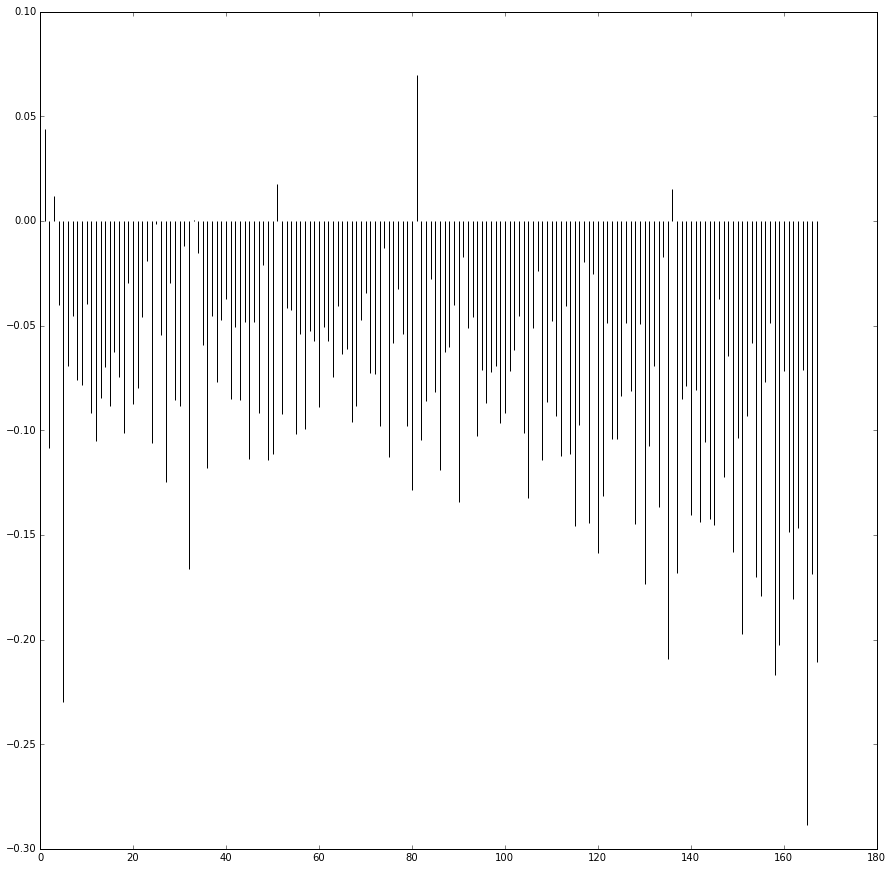

In [58]:
x=arange(1,100)
y0=zeros(len(x))
def gap(k):
    return ((Wkbs)-(Wks))[k]
data=[]
for k in range (0,len(Wks)-1):
     data.append(gap(k)-gap(k+1)-sk[k+1])
data=array(data)        
indices = np.arange(len(data))               
grosor = 0.001
bar(indices, data, grosor)
numeros_positivos=data[data>0]
print "cluster optimo:"
print where(data==min(numeros_positivos))[0][0]#cluster optimo


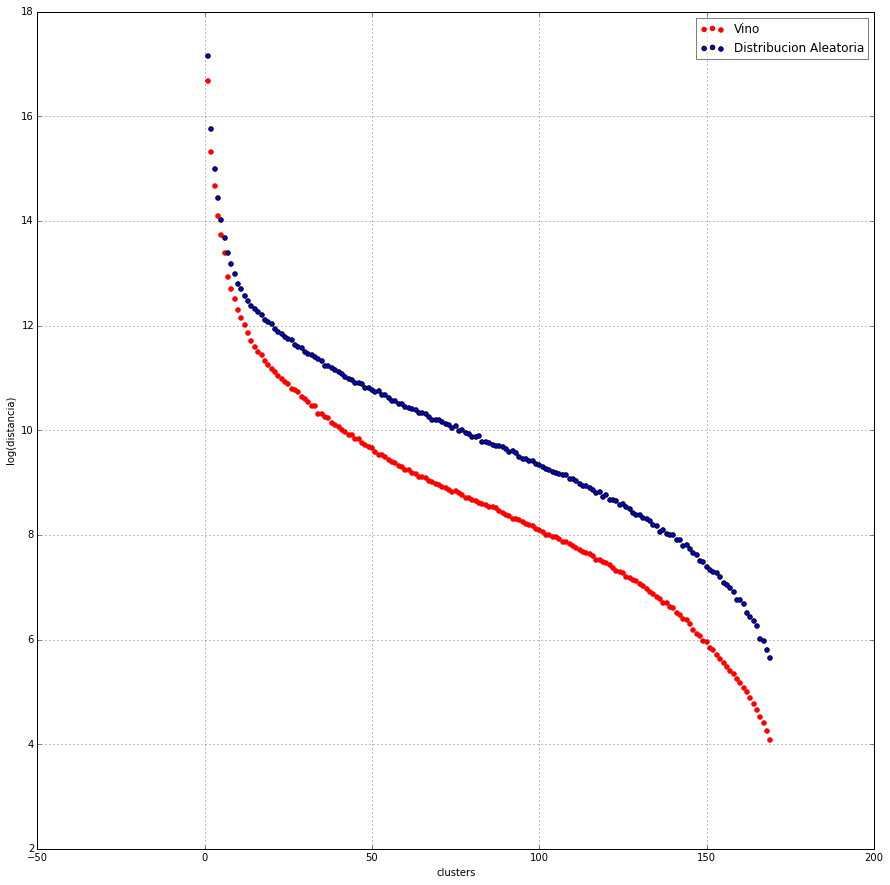

In [59]:
scatter(ks,(Wks),color="red",label='Vino')
scatter(ks,(Wkbs),label='Distribucion Aleatoria')
legend(framealpha=0.5)
ylabel("log(distancia)")
xlabel("clusters")

plt.grid()

# Support Vectors

In [40]:
gamma_range = np.logspace(-2, 2, 20)
c_range = np.logspace(-2, 2, 20)

vino=transpose(transpose(loadtxt('wine.dat', delimiter =","))[1:])
label=transpose(loadtxt('wine.dat', delimiter =","))[:1][0]
indices_aleatorios=randint(0,len(label),len(label))
vino=vino[indices_aleatorios]
label=label[indices_aleatorios]

X_train, X_test, Y_train, Y_test = train_test_split(vino, label, test_size=.4)
param_grid = dict(gamma=gamma_range, C=c_range)
cv = ShuffleSplit(len(label), n_iter=10, test_size=0.1)
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(vino,label)
print("Los mejores parametros son={}, score={}".format(grid.best_params_, grid.best_score_))


Los mejores parametros son={'C': 14.384498882876629, 'gamma': 0.01}, score=0.855555555556
